In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
import tensorflow as tf

In [3]:
df=pd.read_csv('movie.csv')
df.head

<bound method NDFrame.head of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>

<BarContainer object of 40000 artists>

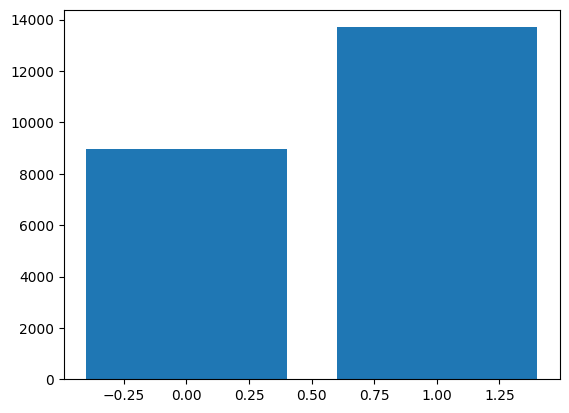

In [4]:
textlens=df['text'].apply(len)
plt.bar(df['label'],textlens)

In [5]:
textlens.max()

13704

**Processing of sentences**

In [134]:
stemmer = SnowballStemmer("english", True)
def stem_words(words):
    return [stemmer.stem(word) for word in words]
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nakul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nakul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nakul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nakul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [140]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN
       
def lemmatize_words(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence

In [147]:
def process(sent):
  sent=sent.replace('<br />',' ')
  sent=sent.replace('-',' ')
  sent = re.sub(r'[^\w\s]', '', sent)
  sent=sent.lower()
  # sent=word_tokenize(sent)
  stop_words = set(stopwords.words('english'))
  # sent = [word for word in sent if word.lower() not in stop_words]
  # sent=stem_words(sent)
  sent=lemmatize_words(sent)
  return sent
t="I recently bought this movie for three bucks at a garage sale, and while I'm glad I didn't have to pay the usual $19.99 for this DVD, I was pleasantly surprised by how good the film was.<br /><br />It's set up like a horror anthology, broken up into 5 tales, including the 'connector' story which involves four teenagers who's car breaks down a dark, lonely road in the middle of the night. Apparently, these kiddos like horror stories, because that's what they decide to do until morning - tell spooky stories around a campfire. Each character takes their turn telling a story, after which their own story is wrapped up with a nice little twist.<br /><br />The first story, ""The Hook"" is kinda a waste of time, a bit bland and dull. Luckily, this is not one of the main stories and only lasts maybe 5 minutes. It's intended merely to introduce the film and it's easy to overlook the unoriginality of this piece.<br /><br />The second story, ""The Honeymooners"" is, eh, okay. It's about - you guessed it - two people on their honeymoon! They're traveling around in an RV headed to Las Vegas. They decide to stop somewhere for the night, but they're quickly warned by a mysterious stranger to leave the location, or risk being attacked by some dangerous, unknown creatures. This story has a pretty good setup, but just merely an 'ok' delivery. Basically, it's fairly entertaining and mysterious till the monsters show up, then it's just kinda iffy.<br /><br />The third story, ""People Can Lick Too"" is my personal favorite. It involves a young girl who's parents are going out for the night and who's older sis is ditching her for a party. So, she's going to be all alone - a fact she makes known to an internet buddy of hers. Trouble is, that internet buddy? Is not exactly a thirteen-year-old girl. This story's conclusion is slightly less climatic than I might have liked to have seen, but still pretty dang good.<br /><br />The final story, ""The Locket"" is definitely the one packed with the most atmosphere. Set in a creepy mansion on a dark, rainy night, it's the tale of a young man (played by Glenn Quinn!) traveling around on a motorcycle who stumbles across this house just at the time that he conveniently has a problem with his bike. He meets the mute girl who lives in the house, and falls in love with her at first sight. Unfortunately, not everything is all fine and dandy - and it might have something to do with that locket hanging around her pretty neck...<br /><br />After the stories are wrapped up, we're presented with a twist involving the four teens in the car, a twist which, in retrospect, should have been obvious, but which it didn't really see coming, and it's a quite pleasing conclusion to film.<br /><br />So, all in all, a good movie. Rent it if you can, because unfortunately, I don't really think it has a lot re-watching value. But next time you're in the mood for a vaguely scary litte flick in the same vein as ""Tales of the Darkside"" or something, grab this movie and some popcorn, turn off all the lights, and treat yourself to this surprisingly nifty little flick."
process(t)


'i recently buy this movie for three buck at a garage sale and while im glad i didnt have to pay the usual 1999 for this dvd i be pleasantly surprise by how good the film be it set up like a horror anthology break up into 5 tale include the connector story which involve four teenager whos car break down a dark lonely road in the middle of the night apparently these kiddos like horror story because thats what they decide to do until morning tell spooky story around a campfire each character take their turn tell a story after which their own story be wrap up with a nice little twist the first story the hook be kinda a waste of time a bit bland and dull luckily this be not one of the main story and only last maybe 5 minute it intend merely to introduce the film and it easy to overlook the unoriginality of this piece the second story the honeymooner be eh okay it about you guess it two people on their honeymoon theyre travel around in an rv head to las vega they decide to stop somewhere fo

In [148]:
processed_df=df['text'].apply(process)

In [149]:
processed_df

0        i grow up b 1965 watching and love the thunder...
1        when i put this movie in my dvd player and sit...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dad army fan and nothing will ev...
                               ...                        
39995    western union be something of a forgotten clas...
39996    this movie be an incredible piece of work it e...
39997    my wife and i watch this movie because we plan...
39998    when i first watch flatliners i be amaze it ha...
39999    why would this film be so good but only gross ...
Name: text, Length: 40000, dtype: object

**Vectorisation**

In [150]:
sents = [sent.split() for sent in processed_df]

In [151]:
sents[1][1]

'i'

***GloVe***

In [152]:
embeddings_dict={}
with open('glove/glove.6B.50d.txt','rb') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [155]:
t='awesome'
embeddings_dict[b''+ t.encode()].shape

(50,)

In [156]:
encode = []
for sent in sents:
    encode_sent = [] 
    for word in sent:
        try:
            encode_sent.append(embeddings_dict[b'' + word.encode()])
        except(KeyError):
            encode_sent.append(np.zeros(50))
    encode.append(encode_sent)
encode

In [12]:
from scipy import spatial
import keras
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import layers
from keras import initializers

In [80]:
def find_closest_embeddings(embedding):
   return sorted(embeddings_dict.keys(), key=lambda word:
spatial.distance.euclidean(embeddings_dict[word], embedding))
find_closest_embeddings(embeddings_dict[b'spider-man'])[:10]

[b'spider-man',
 b'wolverine',
 b'punisher',
 b'demon',
 b'beast',
 b'batman',
 b'joker',
 b'superboy',
 b'superman',
 b'spider-woman']

In [22]:
MAX_NUM_WORDS = 100
MAX_SEQUENCE_LENGTH = 20
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(sents)
sequences = tokenizer.texts_to_sequences(sents)

word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [83]:
y_train=df['label']
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [81]:
tokenizer.word_index

{'movi': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'make': 5,
 'see': 6,
 'get': 7,
 'good': 8,
 'time': 9,
 'charact': 10,
 'watch': 11,
 'well': 12,
 'even': 13,
 'stori': 14,
 'would': 15,
 'bad': 16,
 'think': 17,
 'realli': 18,
 'go': 19,
 'show': 20,
 'scene': 21,
 'great': 22,
 'look': 23,
 'say': 24,
 'much': 25,
 'know': 26,
 'end': 27,
 'peopl': 28,
 'love': 29,
 'also': 30,
 'give': 31,
 'take': 32,
 'play': 33,
 'first': 34,
 'come': 35,
 'act': 36,
 'dont': 37,
 'way': 38,
 'thing': 39,
 'find': 40,
 'could': 41,
 'seem': 42,
 'mani': 43,
 'work': 44,
 'plot': 45,
 'actor': 46,
 'want': 47,
 'two': 48,
 'never': 49,
 'littl': 50,
 'tri': 51,
 'best': 52,
 'year': 53,
 'life': 54,
 'ever': 55,
 'man': 56,
 'still': 57,
 'perform': 58,
 'part': 59,
 'feel': 60,
 'use': 61,
 'actual': 62,
 'someth': 63,
 'lot': 64,
 'back': 65,
 'interest': 66,
 'real': 67,
 'old': 68,
 'director': 69,
 'im': 70,
 'doesnt': 71,
 'guy': 72,
 'didnt': 73,
 'woman': 74,
 'live': 75,
 'cast': 76,
 '

In [82]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

155672

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)

In [16]:
EMBEDDING_DIM = embeddings_dict.get(b'a').shape[0]
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_dict.get(word.encode("utf-8"))
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [89]:
embedding_matrix.shape

(101, 50)

In [88]:
embedding_layer = layers.Embedding(101, 50, weights=[embedding_matrix], input_length=50, trainable=False)

In [90]:
model = keras.models.Sequential()
model.add(embedding_layer)
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,050 (19.73 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,050 (19.73 KB)

In [91]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model_history=model.fit(encode, y_train,batch_size=1024,epochs=15,verbose=1)

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
transformed=tfidf.fit_transform(df['text'].apply(process))

In [94]:
print(transformed)

  (0, 73699)	0.11921330230009414
  (0, 45452)	0.10829709166977206
  (0, 66799)	0.07520854047369015
  (0, 131616)	0.1922738301776966
  (0, 117738)	0.3403649195911314
  (0, 65530)	0.15166977226337391
  (0, 84250)	0.16575075143800222
  (0, 113476)	0.09548125300037481
  (0, 4409)	0.08147512241372341
  (0, 85258)	0.05730701340034936
  (0, 113139)	0.08657560531248348
  (0, 25029)	0.09845030510106864
  (0, 116404)	0.09979365373389827
  (0, 145459)	0.08169047834328927
  (0, 50342)	0.027063372214387073
  (0, 148548)	0.06337051533371726
  (0, 65762)	0.10577363446488805
  (0, 29884)	0.0578635017070023
  (0, 146273)	0.06785200305877484
  (0, 25112)	0.10741520199737226
  (0, 38194)	0.05233043544197268
  (0, 61163)	0.06559929516724257
  (0, 53509)	0.16389281164126251
  (0, 73417)	0.1922738301776966
  (0, 32588)	0.06877293176217326
  :	:
  (39999, 141962)	0.07855663212360514
  (39999, 16631)	0.06745408004485229
  (39999, 73245)	0.09687077994143349
  (39999, 135785)	0.07909979274256718
  (39999, 12872

In [95]:
impt = pd.DataFrame(transformed[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
impt = impt.sort_values('TF-IDF', ascending=False)
impt

,TF-IDF
thunderbird,0.441130
sapien,0.340365
school,0.211332
jonatha,0.192274
subsp,0.192274
...,...
flavorofthemonth,0.000000
flavorsofthedecad,0.000000
flavorsom,0.000000
flavorswhat,0.000000


In [105]:
impt['TF-IDF']['subsp']

0.1922738301776966

In [114]:
def embed(text):
    lst=[]
    for word in process(text):
        if word not in impt['TF-IDF']:
            continue
        lst.append(impt['TF-IDF'][word])
    return lst

In [115]:
train=df['text'].apply(embed)